# Developement of Dap Simulator for multiple protocols

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dap.dap_sim_multi_protocol import DAPSimulatorMultiProtocol
from dap.utils import obs_params, syn_current, syn_step_current, load_current

In [3]:
np.set_printoptions(suppress=True, precision=2)

## Dev the split of currents and times

In [4]:
def syn_step_current(duration=200, dt=0.01, t_on=55, t_off=60, amp=3.1, seed=None, on_off=False):
    """Simulation of ramp current"""
    t = np.arange(0, duration, dt)
    I = np.zeros_like(t)

    stim = len(I[int(np.round(t_on/dt)):int(np.floor(t_off/dt))])

    I[int(np.round(t_on/dt)):int(np.round(t_off/dt))] = 1

    return I, t, t_on, t_off

In [5]:
def syn_current(duration=200, dt=0.01, t_on=55, t_off=60, amp=3.1, seed=None, on_off=False):
    """Simulation of triangular current"""
    t = np.arange(0, duration, dt)
    I = np.zeros_like(t)

    stim = len(I[int(np.round(t_on/dt)):int(np.floor(t_off/dt))])

    i_up = np.linspace(0, amp, (stim/2))
    i_down = np.linspace(amp, 0, (stim/2))

    I[int(np.round(t_on/dt)):int(np.round(t_off/dt))] = np.append(i_up, i_down)[:]

    return I, t, t_on, t_off


/home/ateska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/ateska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


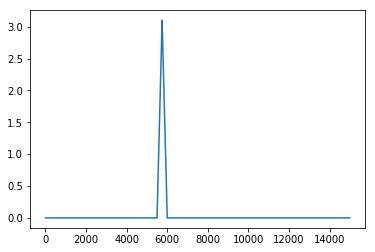

In [6]:
I, t, t_on, t_off = syn_current(duration=150, dt=0.01)
plt.plot(I);

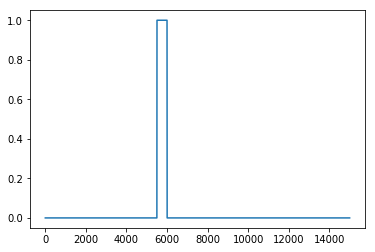

In [7]:
I1, t1, t_on1, t_off1 = syn_step_current(duration=150, dt=0.01)

plt.plot(I1);

In [8]:
I, I1

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [9]:
dt = 0.1

I_all = [I, I1]
I_all

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]

In [10]:
n_currents, _ = np.shape(I_all)

t_all = []
for I in I_all:
    t = np.linspace(0, len(I), len(I))*dt
    t_all.append(t)
    
t_all

[array([   0. ,    0.1,    0.2, ..., 1499.8, 1499.9, 1500. ]),
 array([   0. ,    0.1,    0.2, ..., 1499.8, 1499.9, 1500. ])]

## Look at the actual functions in DAP

In [11]:
dt = 0.01
params, labels = obs_params()
params_list = [params]
I, t, t_on, t_off = syn_current(duration=150, dt=dt)
I1, t1, t_on1, t_off1 = syn_step_current(duration=150, dt=dt)

/home/ateska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/ateska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [12]:
I_all = [I, I1]
dt_all = [dt, dt]
I_all

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]

In [13]:
# define model
dap1 = DAPSimulatorMultiProtocol(I_all, dt_all, -75)

# run model
stats = dap1.gen_single(params, I_all[0], t, dt)
data_list = dap1.gen(params_list)

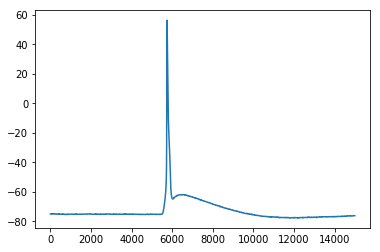

In [14]:
plt.plot(data_list[0][0]['data']);

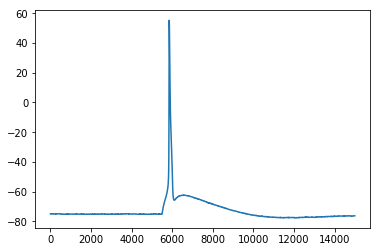

In [15]:
plt.plot(data_list[1][0]['data']);

In [16]:
data_list

[[{'data': array([-75.  , -75.  , -75.01, ..., -76.21, -76.22, -76.22]),
   'time': array([  0.  ,   0.01,   0.02, ..., 149.98, 149.99, 150.  ]),
   'dt': 0.01,
   'I': array([0., 0., 0., ..., 0., 0., 0.])}],
 [{'data': array([-75.01, -74.98, -74.97, ..., -76.29, -76.32, -76.34]),
   'time': array([  0.  ,   0.01,   0.02, ..., 149.98, 149.99, 150.  ]),
   'dt': 0.01,
   'I': array([0., 0., 0., ..., 0., 0., 0.])}]]

### Look at real data

In [17]:
data_dir = '/home/ateska/Desktop/LFI_DAP/data/rawData/2015_08_26b.dat'    # best cell

# load the data
Ir, vr, tr, t_onr, t_offr, dtr = load_current(data_dir, protocol='rampIV', ramp_amp=3.1)
Is, vs, ts, t_ons, t_offs, dts = load_current(data_dir, protocol='IV', ramp_amp=1)

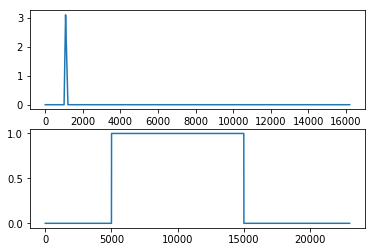

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Ir)
ax[1].plot(Is)

In [19]:
I_all = [Ir, Is]
dt_all = [dtr, dts]

I_all

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]

In [20]:
np.shape(I_all)

(2,)

In [21]:
# define model
dap1 = DAPSimulatorMultiProtocol(I_all, dt_all, -75)

# run model
stats = dap1.gen_single(params, I_all[0], t, dt)
data_list = dap1.gen(params_list)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
data_list